# Customer Churn Prediction

# Libraries

In [1]:
import pandas as pd

from sklearn.model_selection import (
    train_test_split,
    cross_val_predict,
    cross_val_score,
    GridSearchCV
)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    DetCurveDisplay,
    RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from utils.customers_data_prep   import CustomersDataPrep
from utils.customers_feature_eng import CustomersFeatureEng

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("customer_churn.csv")

data_preparer = CustomersDataPrep()
feature_engine = CustomersFeatureEng()

# Data Prep

In [3]:
df = data_preparer.prepare_data(df=df, conditionals=True)

numerical_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "InternetServices"
]

categorical_features = [
    "InternetService",
    "Contract",
    "PaymentMethod"
]

# Feature Engineering

In [4]:
X = df.drop(["Churn"], axis=1).copy()
y = df["Churn"].copy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = feature_engine.create_features(X_train)
X_test  = feature_engine.create_features(X_test)

preprocessor = feature_engine.preprocessor(
    numerical_features=numerical_features,
    categorical_features=categorical_features,
)

# Machine Learning Modeling

## Model Selection

In [6]:
models_instances = [
    LogisticRegression(class_weight="balanced", random_state=42),
    RandomForestClassifier(class_weight="balanced", random_state=42),
    DecisionTreeClassifier(class_weight="balanced", random_state=42),
    SVC(class_weight="balanced", random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    MLPClassifier(hidden_layer_sizes=(50,50), random_state=42)
]

models = {
    model_instance.__class__.__name__: Pipeline(
        steps=[
            ('preprocessor', preprocessor),
             ('classifier', model_instance)
    ]) for model_instance in models_instances
}

### Training

Model: LogisticRegression


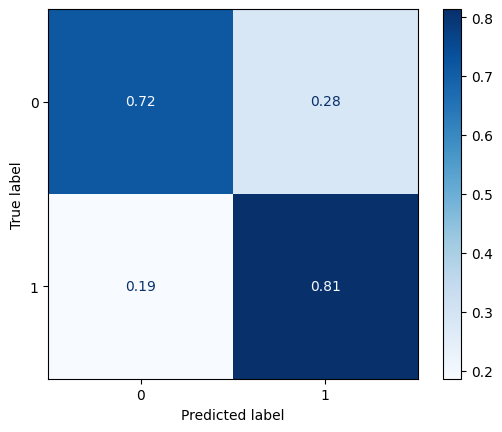

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      3881
           1       0.51      0.81      0.63      1401

    accuracy                           0.74      5282
   macro avg       0.71      0.77      0.71      5282
weighted avg       0.81      0.74      0.76      5282

Model: RandomForestClassifier


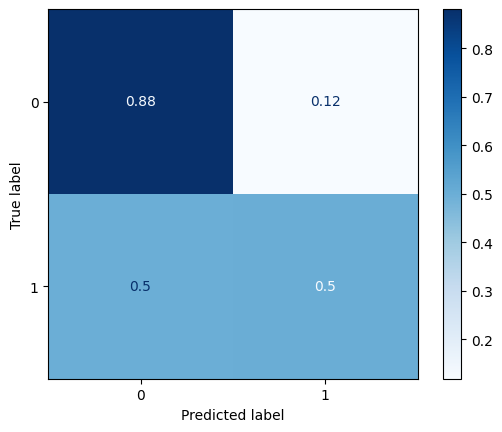

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3881
           1       0.60      0.50      0.55      1401

    accuracy                           0.78      5282
   macro avg       0.72      0.69      0.70      5282
weighted avg       0.77      0.78      0.77      5282

Model: DecisionTreeClassifier


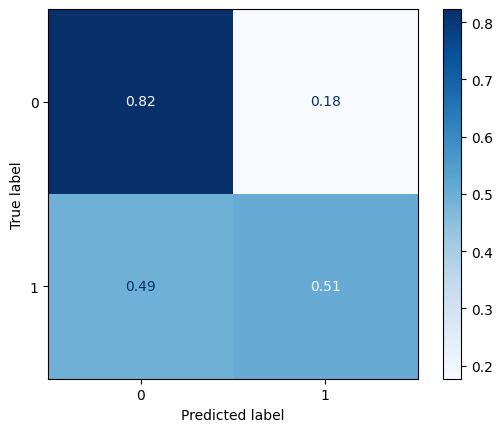

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3881
           1       0.51      0.51      0.51      1401

    accuracy                           0.74      5282
   macro avg       0.66      0.66      0.66      5282
weighted avg       0.74      0.74      0.74      5282

Model: SVC


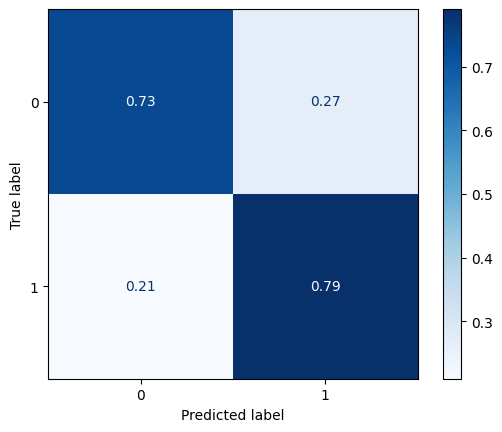

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3881
           1       0.51      0.79      0.62      1401

    accuracy                           0.75      5282
   macro avg       0.71      0.76      0.72      5282
weighted avg       0.80      0.75      0.76      5282

Model: KNeighborsClassifier


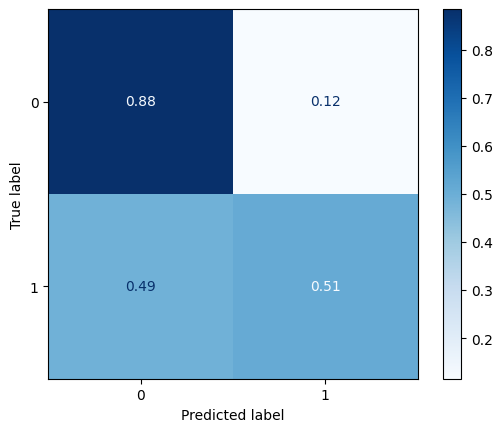

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      3881
           1       0.61      0.51      0.56      1401

    accuracy                           0.79      5282
   macro avg       0.72      0.70      0.71      5282
weighted avg       0.78      0.79      0.78      5282

Model: XGBClassifier


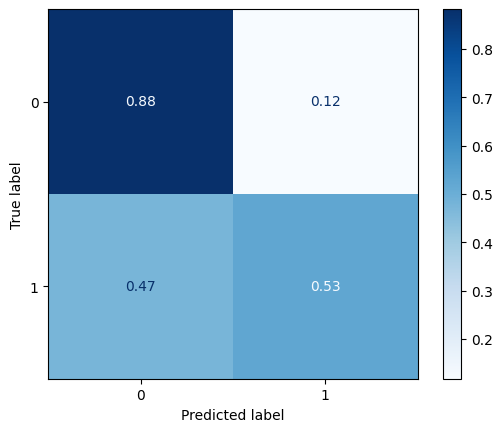

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3881
           1       0.62      0.53      0.57      1401

    accuracy                           0.79      5282
   macro avg       0.73      0.70      0.71      5282
weighted avg       0.78      0.79      0.78      5282

Model: MLPClassifier


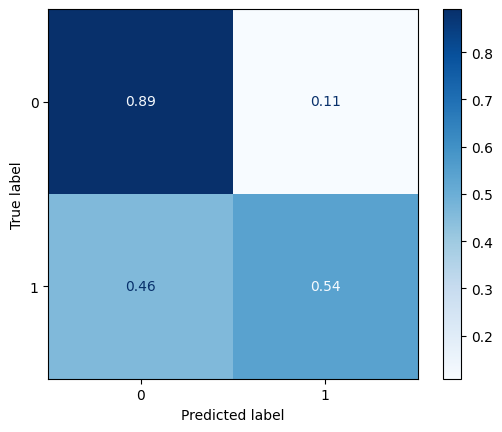

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3881
           1       0.64      0.54      0.59      1401

    accuracy                           0.80      5282
   macro avg       0.74      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282



In [7]:
for model in models:
    print(f"Model: {model}")
    # scores = cross_val_score(models[model], X_train, y_train, cv=5)
    # print(f"Cross-validation accuracy: {scores.mean()} +/- {scores.std()}")

    y_pred = cross_val_predict(models[model], X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm
    )
    disp.plot(cmap='Blues')
    plt.show()

    print(classification_report(y_train, y_pred))

### Testing

Model: LogisticRegression


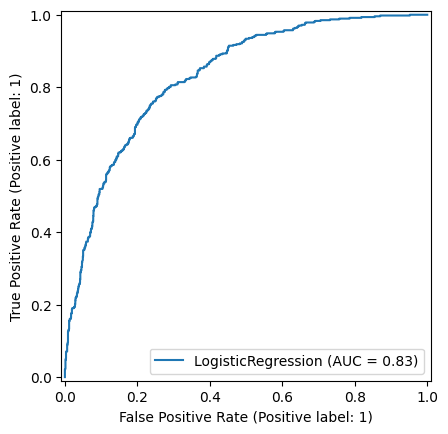

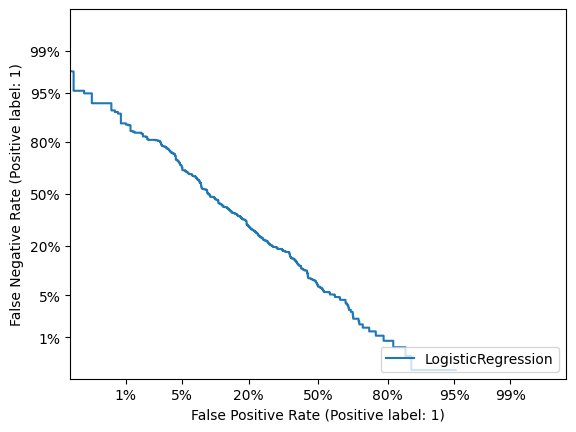

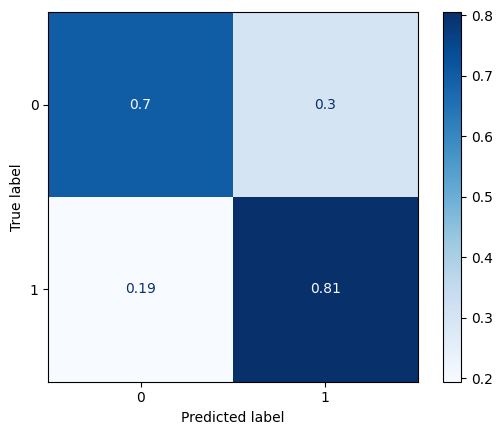

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1293
           1       0.49      0.81      0.61       468

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.80      0.73      0.74      1761

Model: RandomForestClassifier


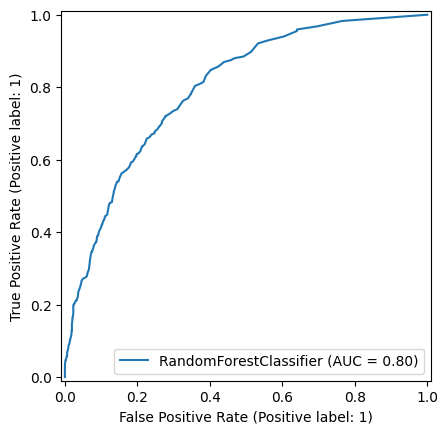

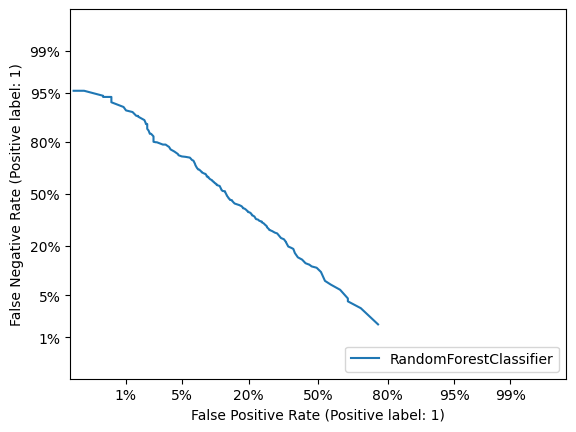

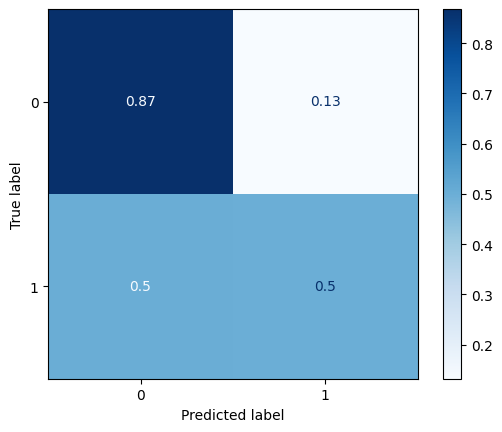

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1293
           1       0.58      0.50      0.53       468

    accuracy                           0.77      1761
   macro avg       0.70      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761

Model: DecisionTreeClassifier


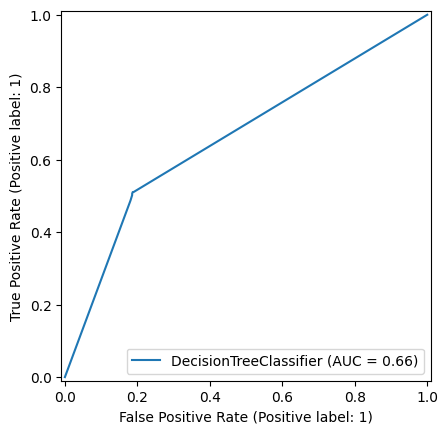

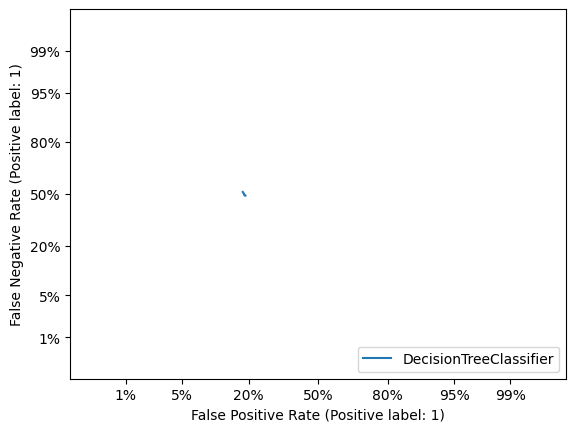

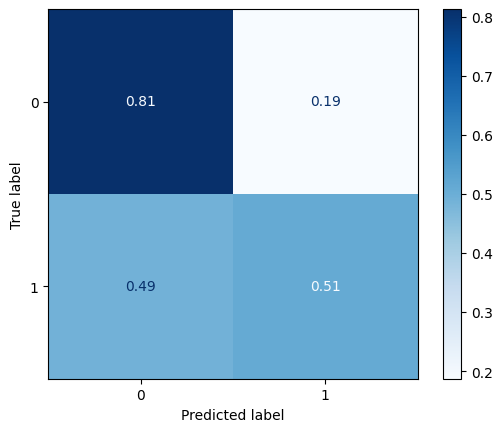

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1293
           1       0.50      0.51      0.50       468

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761

Model: SVC


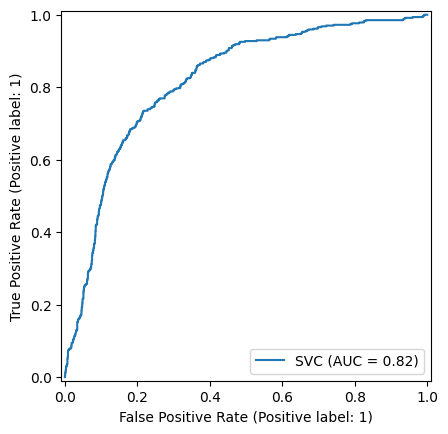

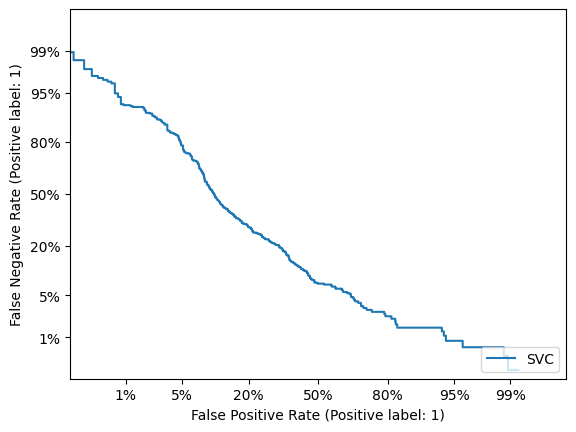

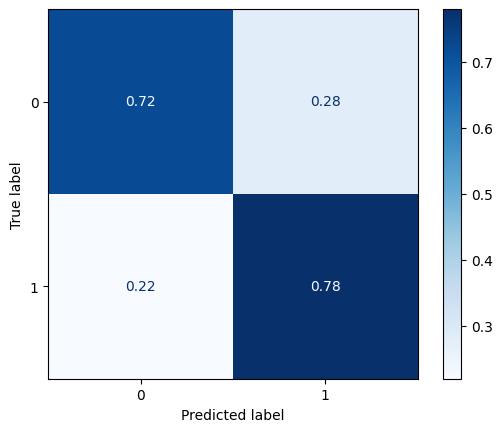

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1293
           1       0.50      0.78      0.61       468

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761

Model: KNeighborsClassifier


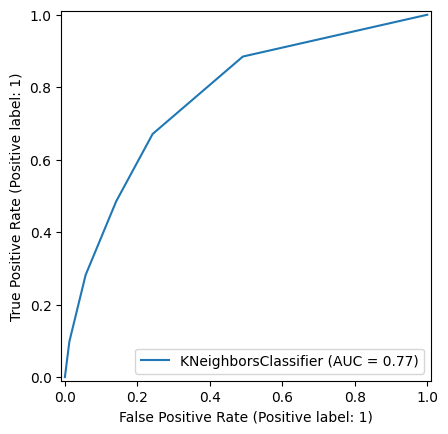

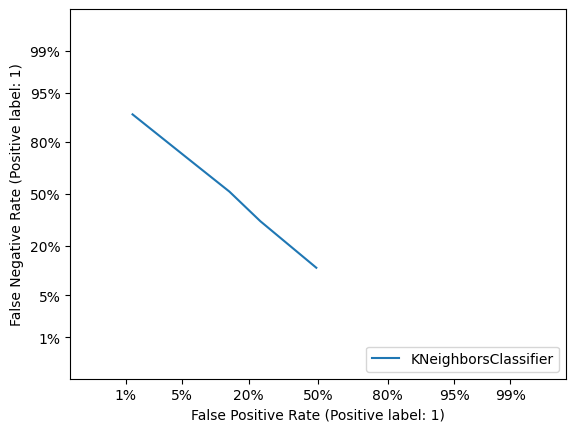

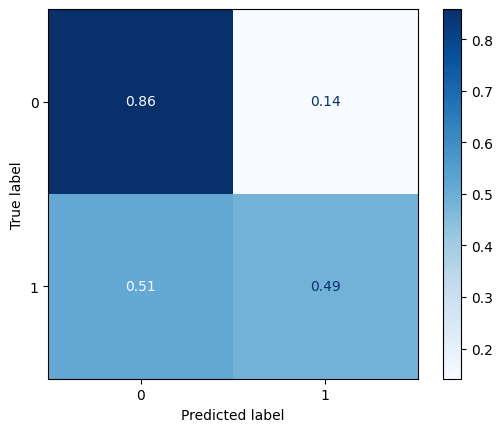

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1293
           1       0.55      0.49      0.52       468

    accuracy                           0.76      1761
   macro avg       0.69      0.67      0.68      1761
weighted avg       0.75      0.76      0.75      1761

Model: XGBClassifier


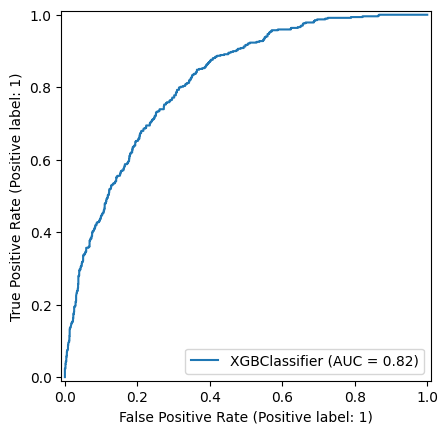

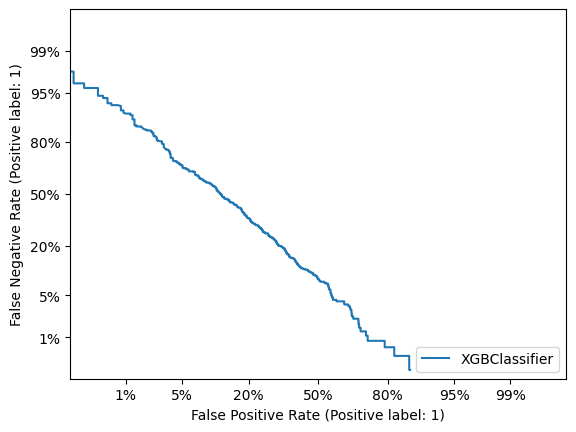

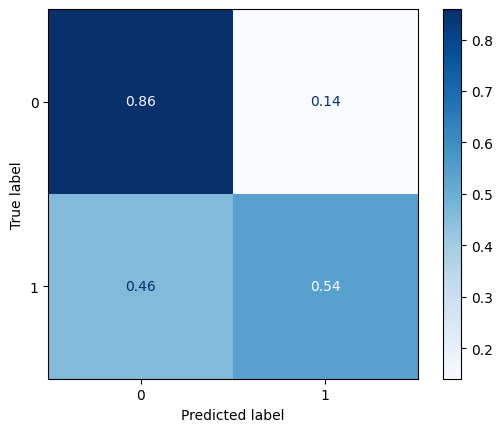

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1293
           1       0.58      0.54      0.56       468

    accuracy                           0.77      1761
   macro avg       0.71      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761

Model: MLPClassifier


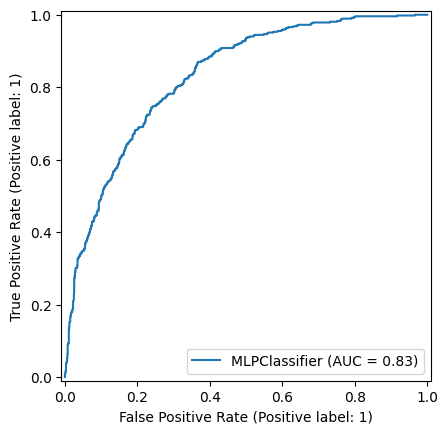

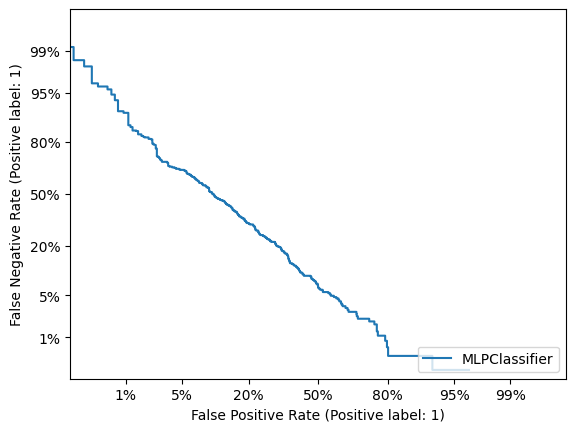

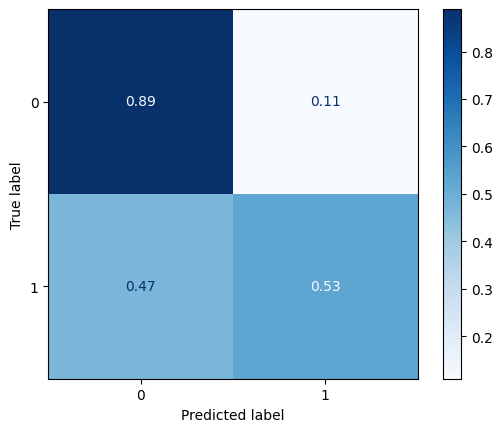

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1293
           1       0.63      0.53      0.58       468

    accuracy                           0.79      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.78      0.79      0.79      1761



In [8]:
for model in models:
    print(f"Model: {model}")
    models[model].fit(X_train, y_train)
    RocCurveDisplay.from_estimator(models[model], X_test, y_test, name=model)
    DetCurveDisplay.from_estimator(models[model], X_test, y_test, name=model)

    y_pred = models[model].predict(X_test)

    # scores = accuracy_score(y_test, y_pred)
    # print(f"Testing accuracy: {scores.mean()} +/- {scores.std()}")

    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm
    )
    disp.plot(cmap='Blues')
    plt.show()

    print(classification_report(y_test, y_pred))

    # roc_display.plot()
    # det_display.plot()

> Logistic regression was choose, because of its performance, simplicity and facility to deploy.

# Hyperparameter Tuning

In [9]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [10]:
pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
             ('classifier', LogisticRegression(class_weight="balanced", random_state=42))
    ])

In [11]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', verbose=1)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'InternetServices']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['InternetService',
                                                                          'Contract',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             scoring='recall', verbose=1)

# Model Evaluation

In [13]:
print("Melhores Parâmetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print()
print(classification_report(y_test, y_pred))

Melhores Parâmetros: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1293
           1       0.49      0.81      0.61       468

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.80      0.73      0.74      1761



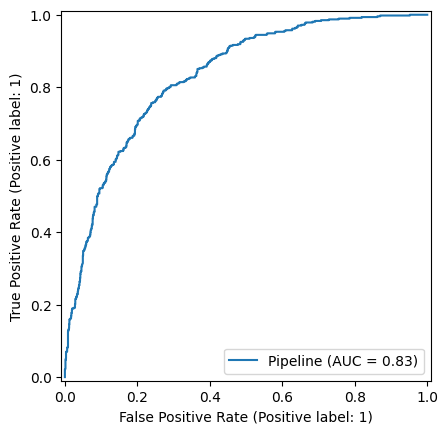

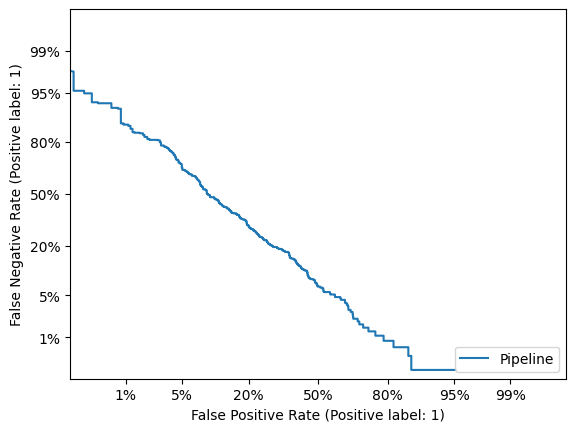

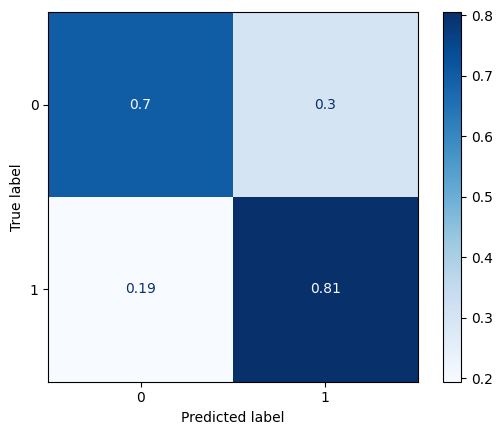

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1293
           1       0.49      0.81      0.61       468

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.80      0.73      0.74      1761



In [14]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test, name=best_model.__class__.__name__)
DetCurveDisplay.from_estimator(best_model, X_test, y_test, name=best_model.__class__.__name__)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm
)
disp.plot(cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

# Conclusions

468 was the number of people who would churn in the test base (represents the real scenario, with examples that the model does not know).

Of these 468, if the company had a churn prediction model, it would be possible to use strategies to save 377 people who the model predicted would churn, that is, approximately **81%** of the customers who would leave.

Thus, a 100% investment loss on an expensive installation would be reduced to just 19%. This is without considering that over time the loss of 19% could be compensated by keeping the other 81%.